In [79]:
import faceBlending as fb
import utils as ut

In [13]:
import matplotlib.pyplot as plt

In [44]:
import numpy as np

In [11]:
img_path = "/Users/emrekavak/Documents/Ethical_AI/EAI_Data/CelebASample/"
srcp = "000001.jpg"
trgtp = "000002.jpg"

In [12]:
src_im = fb.dlib.load_rgb_image(img_path+srcp)
trgt_im = fb.dlib.load_rgb_image(img_path+trgtp)

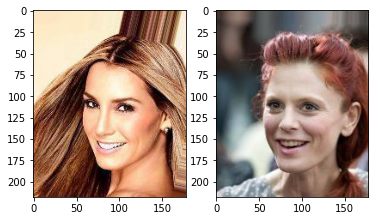

In [20]:
f, ax = plt.subplots(1,2)
ax[0].imshow(src_im)
ax[1].imshow(trgt_im)

# 1.) detect bounding boxes of faces

In [22]:
detector = fb.dlib.get_frontal_face_detector()

In [23]:
boxes = detector(src_im, 1)

In [30]:
box = boxes.pop()

In [47]:
x = [box.tr_corner().x, box.tl_corner().x, box.br_corner().x, box.bl_corner().x]
y = [box.tr_corner().y, box.tl_corner().y, box.br_corner().y, box.bl_corner().y]

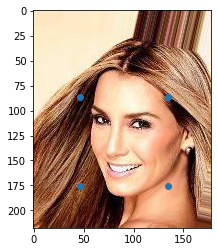

In [52]:
plt.imshow(src_im)
plt.scatter(x,y)

# 2.) Detect facial Landmarks

In [76]:
trained_pred_path = "/Users/emrekavak/Documents/Ethical_AI/repo/proj-4/Face-X-Ray-master/shape_predictor_68_face_landmarks.dat"
predictor = fb.dlib.shape_predictor(trained_pred_path)

In [77]:
landmarks = predictor(src_im, box)

In [84]:
landmarks_np = ut.shape_to_np(landmarks)

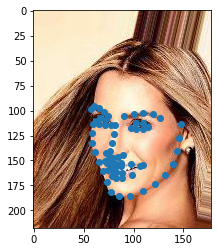

In [89]:
plt.imshow(src_im)
plt.scatter(landmarks_np[:,0], landmarks_np[:,1])

In [88]:
landmarks_np.shape

(68, 2)

# 3.) Convex Hull (get face mask)

In [90]:
mask = fb.convex_hull(src_im.shape, landmarks_np)

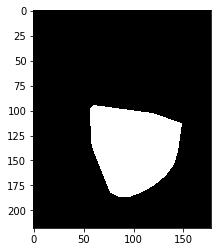

In [96]:
plt.imshow(mask)

# 4.) "random deform" --> shift points on grid randomly by normal dist. + clipping (points should stay in image space) 

In [107]:
anchors, deformedAnchors = fb.random_deform(mask.shape[:2], 4, 4)

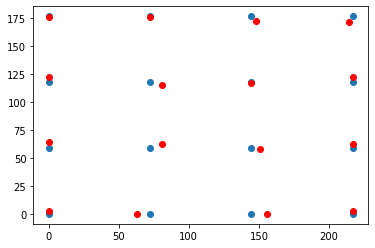

In [108]:
plt.scatter(anchors[:,0],anchors[:,1])
plt.scatter(deformedAnchors[:,0],deformedAnchors[:,1],c="r")

### now apply same transformation to mask; using Delaunay triangulation + affine transform for each corresponding triangle

In [111]:
warped = fb.piecewise_affine_transform(mask, anchors, deformedAnchors)

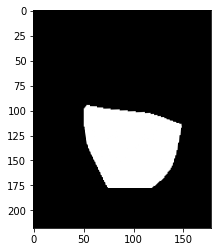

In [112]:
plt.imshow(warped)

# 5.) add blurring to mask

In [114]:
blurred = fb.cv2.GaussianBlur(warped, (5,5), 3)

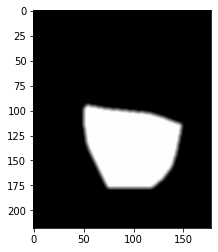

In [115]:
plt.imshow(blurred)

# 6.) Color Transfer

In [117]:
left, up, right, bot = min(landmarks_np[:,0]), min(landmarks_np[:,1]), max(landmarks_np[:,0]), max(landmarks_np[:,1])
trgt_im_coltransfer = fb.color_transfer(src_im[up:bot,left:right,:], trgt_im)

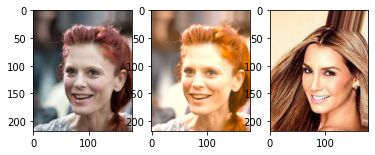

In [120]:
f, ax = plt.subplots(1,3)
ax[0].imshow(trgt_im)
ax[1].imshow(trgt_im_coltransfer)
ax[2].imshow(src_im)

# 7.) Forge (using formula from paper)

In [122]:
forgedFace = fb.forge(src_im, trgt_im_coltransfer, blurred)

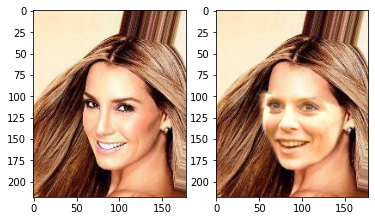

In [124]:
f, ax = plt.subplots(1,2)
ax[0].imshow(src_im)
ax[1].imshow(forgedFace)